In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def rbf_kernel(x, sigma=1):
    '''
    
    '''
    nrow, ncol = np.shape(x)
    k = np.matmul(x, np.transpose(x)) / (sigma ** 2)
    d = np.diag(k)
    # subtract diagonal one time as a row and once as a column
    k1 = k - (d.reshape(-1, 1) / (2 * (sigma ** 2)))
    k2 = k1 - (d.reshape(1, -1) / (2 * (sigma ** 2)))
    k3 = np.exp(k2)
    return k3


def rbf_n_white_kernel(ɾ, λ, σ):
    return (ɾ**2 * gp.kernels.RBF(length_scale=λ) + gp.kernels.WhiteKernel(noise_level=σ))


In [12]:
def generate_priors(kernel, n, num_func):
    '''
    
    '''
    L = np.linalg.cholesky(k + np.exp(-6) * np.eye(n))
    f_prior = np.dot(L, np.random.normal(size=(n, num_func)))
    return f_prior.reshape(num_func, -1)

In [33]:
x_te = np.linspace(-5, 5, 50).reshape(-1, 1)
k = rbf_kernel(x_te)
f_prior = generate_priors(k, 50, 50)

In [21]:
def plot_gp_prior(num_func, data=None, n=50):
    '''
    
    
    '''
    if (data):
        x_te = data
        n = len(x_te)
    else:
        x_te = np.linspace(-5, 5, n).reshape(-1, 1)
    k = rbf_kernel(x_te)
    f_prior = generate_priors(k, n, num_func)
    with matplotlib.rc_context({'figure.figsize': [12, 5]}):
        for idx, func in enumerate(f_prior):
            plt.plot(x_te, func, label='f' + str(idx))
        plt.xlabel('X')
        plt.ylabel('fi(X) = y')
        plt.title('Prior functions drawn from Gausian distribution')
        plt.legend()
        plt.show()


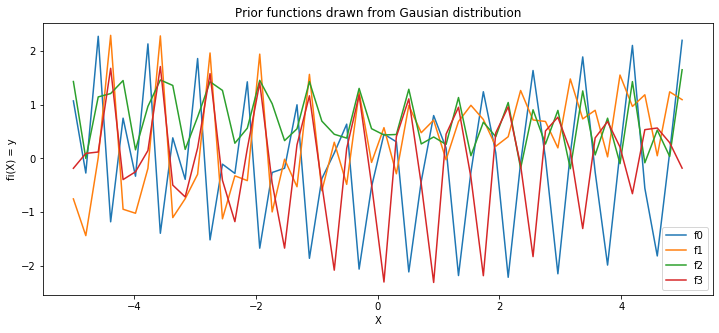

In [35]:
plot_gp_prior(4, n=50)